<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos, denominado `vehiculos_procesado_con_grupos.csv`, contiene algunas de las características más importantes de los vehículos. El objetivo de este ejercicio es clasificar los vehículos en diferentes categorías, basándonos en las características que se describen a continuación.

El desafío de este ejercicio radica en la combinación de variables numéricas y categóricas, lo que añade complejidad al análisis.

Lo primero que haremos será cargar el conjunto de datos:

**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [ ]:
# 1. Normalizar datos numéricos
numeric_data = df.select_dtypes(include='number')
numeric_data = numeric_data.fillna(numeric_data.mean())
# Normalizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
normalized_numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

# 2. Codificar variables categóricas
categorical_data = df.select_dtypes(include='object')
encoded_categorical_data = pd.get_dummies(categorical_data)

# 3. Combinar ambos datasets
df_procesado = pd.concat([normalized_numeric_data, encoded_categorical_data], axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


Explique a grande rasgo como se realiza la codificación de variables numéricas
a categóricas :

R: se convienten datos numeros a categorias, esto analizando los datos _tipo y subdividiendolos en grupos correspondiente, indicando con los valores True o False a cual corresponde.

### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [ ]:
#1 AJUSTAR MODELO
from sklearn.cluster import KMeans

# modelo KMeans con 8 clusters
kmeans = KMeans(n_clusters=8, random_state=0)

#2 Calcular los centroides de cada cluster

df_procesado['cluster'] = kmeans.fit_predict(df_procesado) #Asociar a cada individuo el correspondiente cluster
centroides = kmeans.cluster_centers_ #Calcular los centroides de cada cluster

In [ ]:
#3. Realizar un resumen de las principales cualidades de cada cluster. Para esto debe calcular (para cluster) las siguientes medidas de resumen:
 #   * Valor promedio de las variables numérica
  #  * Moda para las variables numericas
average_per_cluster = df_procesado.groupby('cluster').mean()
from scipy import stats
def mode_per_cluster(group):
    # Asegurar que solo se calcula la moda para columnas numéricas
    numeric_group = group.select_dtypes(include=[np.number])
    modes = stats.mode(numeric_group, axis=0, nan_policy='omit')
    return pd.Series(modes.mode[0], index=numeric_group.columns)

# Aplica la función de moda ajustada a cada grupo
mode_per_cluster = df_procesado.groupby('cluster').apply(mode_per_cluster)
print(average_per_cluster)






             year  desplazamiento  cilindros       co2  consumo_litros_milla  \
cluster                                                                        
0        0.476784        0.450865   0.327065  0.409944              0.343249   
1        0.614860        0.460275   0.342749  0.358805              0.286420   
2        0.570711        0.169814   0.146131  0.241104              0.156573   
3        0.480382        0.249279   0.194417  0.304375              0.226309   
4        0.705789        0.271544   0.217670  0.316503              0.239800   
5        0.286340        0.542483   0.405091  0.511308              0.453247   
6        0.451736        0.586061   0.424752  0.505370              0.448271   
7        0.385755        0.290829   0.241164  0.352486              0.280273   

         clase_tipo_Camionetas  clase_tipo_Coche Familiar  \
cluster                                                     
0                     0.306031                   0.017109   
1               

<ipython-input-14-b5aa3d0c82f1>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mode_per_cluster = df_procesado.groupby('cluster').apply(mode_per_cluster)


In [ ]:
print(mode_per_cluster)

             year  desplazamiento  cilindros       co2  consumo_litros_milla  \
cluster                                                                        
0        0.029412        0.029412   0.029412  0.029412              0.029412   
1        0.911765        0.911765   0.911765  0.911765              0.911765   
2        0.970588        0.970588   0.970588  0.970588              0.970588   
3        0.000000        0.000000   0.000000  0.000000              0.000000   
4        0.970588        0.970588   0.970588  0.970588              0.970588   
5        0.000000        0.000000   0.000000  0.000000              0.000000   
6        0.000000        0.000000   0.000000  0.000000              0.000000   
7        0.088235        0.088235   0.088235  0.088235              0.088235   

          cluster  
cluster            
0        0.029412  
1        0.911765  
2        0.970588  
3        0.000000  
4        0.970588  
5        0.000000  
6        0.000000  
7        0.088235  

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [ ]:
# implementación de la regla del codo
Nc = [5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]  # Suppressing the warning here
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters': Nc, 'Score': score})

df_Elbow.head()

,Number of Clusters,Score
0,5,113833.849785
1,10,87917.399745
2,20,67682.333445
3,30,58723.169931
4,50,45583.466272


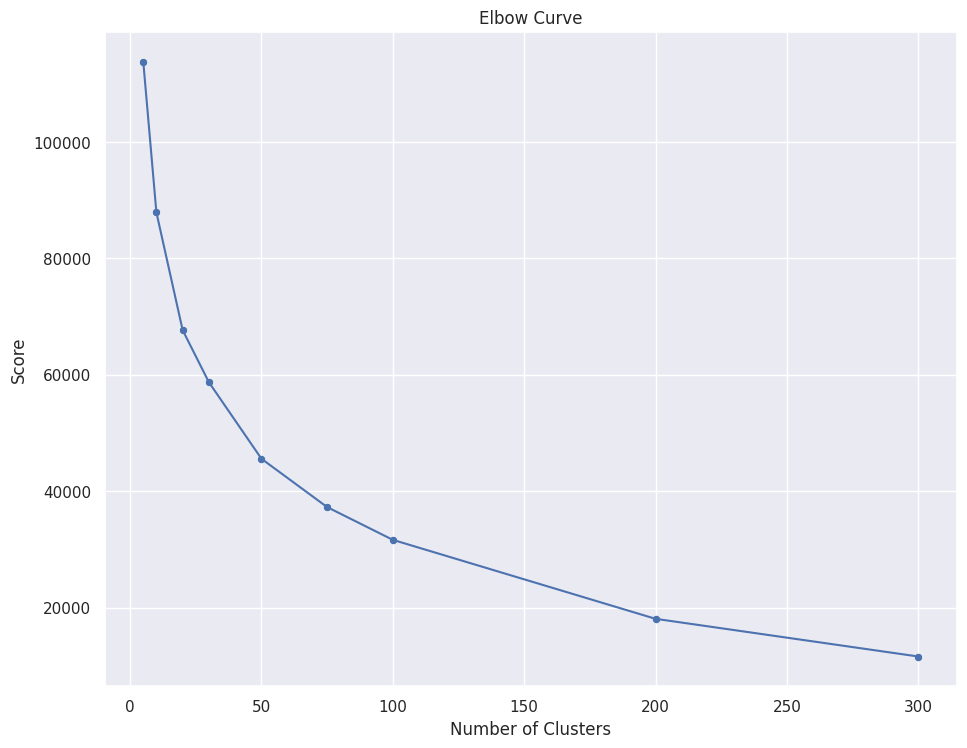

In [ ]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Lo anteriormente mencionado ocurre en el clauster 100

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

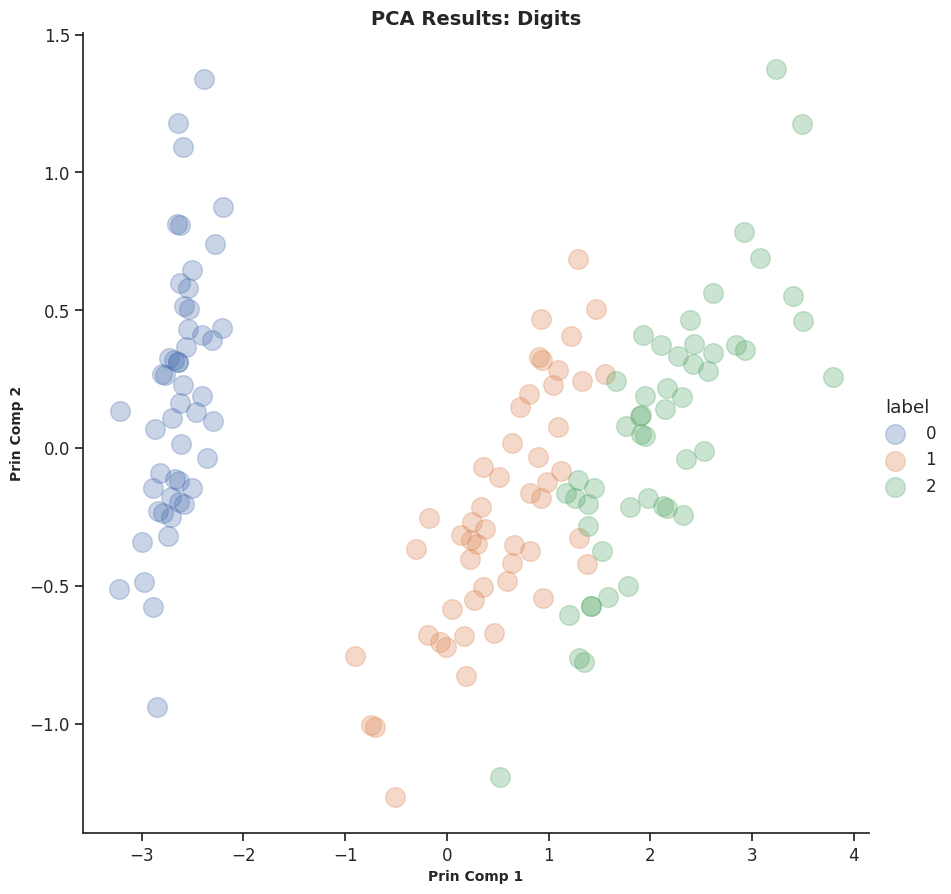

In [ ]:
#Tal como se enseñó en clases, se procede a comparar de manera visual los algoritmos de PCA y tSNE

# PCA
scaler = StandardScaler() #escalar

X = iris.drop(columns='species')
y = iris['species']
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['label'] = y

# Plot Digits PCA


# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

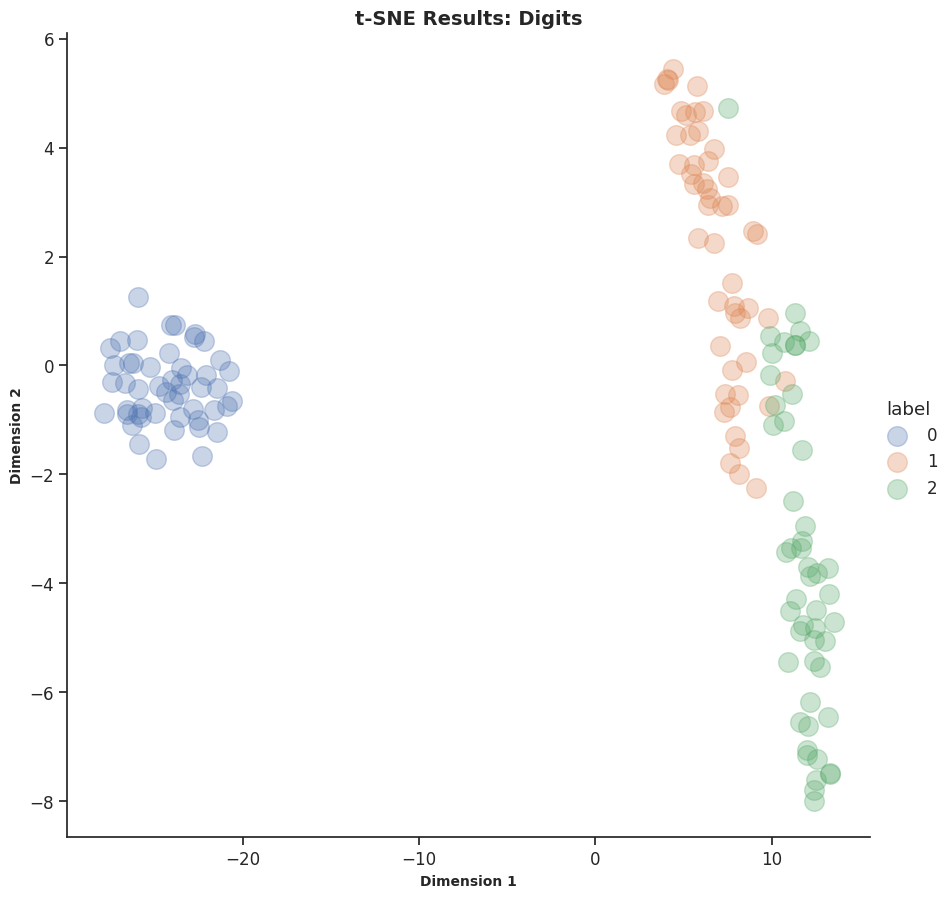

In [ ]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']

embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)

df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = y

# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

COMPARACION: En base a los graficos se observa que para PCA, las especias 0,1,2 estan separadas del eje principal, existiendo una superposicion entre las clases 1y 2 pq lo que PCA se limita a separar estas especies.

Para TSNE , las especoes esta mas separadas especialmente la especie 0, pese a que sigue habiendo una superposicion entre 1 y 2, estas verticalmente estan alineadas por lo que visualmente se aprecia la separacion.